## OpenCV

OpenCV (Open Source Computer Vision Library) is an open-source software library that provides a collection of tools and functions for real-time computer vision, machine learning, and image processing

In [7]:
# to install opencv

!pip install opencv-python

In [8]:
# import opencv
import cv2

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [227, 222, 223],
        [227, 222, 223],
        [227, 222, 223]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [227, 222, 223],
        [227, 222, 223],
        [227, 222, 223]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [227, 222, 223],
        [227, 222, 223],
        [227, 222, 223]],

       ...,

       [[235, 235, 235],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]],

       [[235, 235, 235],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]],

       [[235, 235, 235],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]]], dtype=uint8)
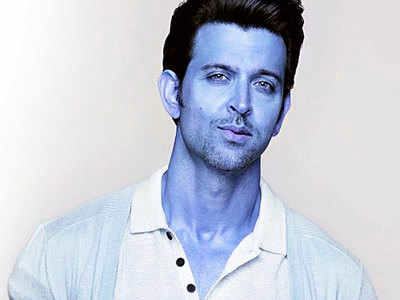

In [9]:
# read image

image = cv2.imread("/content/Hritik.jpeg")
image

array([[254, 254, 254, ..., 224, 224, 224],
       [254, 254, 254, ..., 224, 224, 224],
       [254, 254, 254, ..., 224, 224, 224],
       ...,
       [235, 234, 232, ..., 223, 223, 223],
       [235, 234, 232, ..., 223, 223, 223],
       [235, 234, 232, ..., 223, 223, 223]], dtype=uint8)
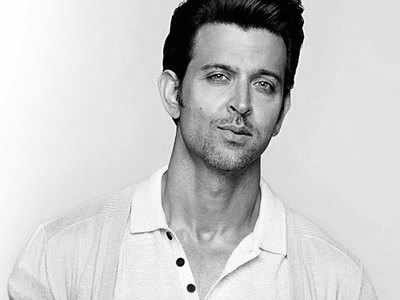

In [11]:
# convert image to gray color

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray

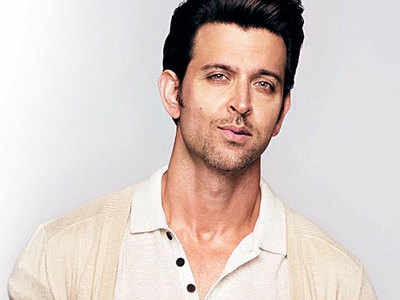

In [14]:
# Display images
from google.colab.patches import cv2_imshow

cv2_imshow(image)

In [17]:
# Wait for a key press and close all windows

# cv2.waitKey(0)  # Wait indefinitely until a key is pressed
# cv2.destroyAllWindows()  # Close all OpenCV windows

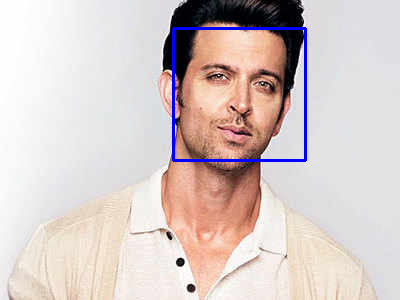

In [34]:
# Face detect

# Step 1: Load the image
image = cv2.imread('/content/Hritik.jpeg')  # Replace with your image path

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Load a pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Step 4: Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=1, minSize=(15, 15))

# Step 5: Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Step 6: Display the result
cv2_imshow(image)

# # Step 7: Wait for a key press and close all windows
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
import cv2

# Step 1: Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Step 2: Start the webcam feed
cap = cv2.VideoCapture("/content/VID20230702182406.mp4")  # '0' indicates the default webcam

while True:
    # Step 3: Read a frame from the webcam
    ret, frame = cap.read()

    # Check if the frame was successfully captured
    if not ret:
        print("Failed to grab frame")
        break

    # Step 4: Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Step 5: Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Step 6: Draw rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Step 7: Display the frame with detected faces
    cv2_imshow(frame)

    # Step 8: Break the loop if the user presses the 'q' key
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

# Step 9: Release the webcam and close any OpenCV windows
cap.release()
# cv2.destroyAllWindows()


In [ ]:
import cv2

# Step 1: Load the pre-trained deep learning model for face detection
model = cv2.dnn.readNetFromCaffe('deploy.prototxt', 'res10_300x300_ssd_iter_140000_fp16.caffemodel')

# Step 2: Start the webcam feed
cap = cv2.VideoCapture("/content/VID20230702182406.mp4")  # '0' for default webcam

while True:
    # Step 3: Read a frame from the webcam
    ret, frame = cap.read()

    if not ret:
        print("Failed to grab frame")
        break

    # Step 4: Prepare the frame for DNN (resize and normalize)
    h, w = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104.0, 177.0, 123.0), swapRB=False, crop=False)
    model.setInput(blob)

    # Step 5: Detect faces in the frame
    detections = model.forward()

    # Step 6: Draw rectangles around detected faces
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        # Only consider detections with confidence greater than a threshold (e.g., 0.5)
        if confidence > 0.5:
            # Get the coordinates of the face
            x1 = int(detections[0, 0, i, 3] * w)
            y1 = int(detections[0, 0, i, 4] * h)
            x2 = int(detections[0, 0, i, 5] * w)
            y2 = int(detections[0, 0, i, 6] * h)

            # Draw a rectangle around the face
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Step 7: Display the frame with the detected faces
    cv2_imshow(frame)

    # Step 8: Break the loop if the user presses 'q'
    # if cv2.waitKey(1) & 0xFF == ord('q'):
        # break

# Step 9: Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


In [43]:
# crop faces

import cv2

# Load the image
image = cv2.imread('/content/Hritik.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the pre-trained Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Check if faces are detected
if len(faces) > 0:
    # Crop the first detected face (if there are multiple, you can loop through the list)
    x, y, w, h = faces[0]
    cropped_face = image[y:y+h, x:x+w]

    # Save the cropped face image
    cv2.imwrite('cropped_face.jpg', cropped_face)
    print("Face detected and saved as 'cropped_face.jpg'")
else:
    print("No faces detected.")


Face detected and saved as 'cropped_face.jpg'
